# Reservoir Characterization Workflow Part 3: 

## We have used the new hierarchical Costa Carbonate Reservoir Benchmarking case study created by Costa Gomes J, Geiger S, Arnold D to be used for reservoir characterization, uncertainty quantification and history matching(1).
---
---
# 1) To Start, initialize the Notebook by running this entire Notebook using the >> in the menu line above:

- Then we will use the widgets to select the individual wells and log analysis parameters after initializing the widgets:


In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a script file.
"""
import math
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import lasio

%matplotlib inline

import time
#timecosts = []
s_time = time.time()


---
# 2) Come back to the widget below after the first initialization run, and then use the widget below to select a new well and run from START POINT 1:
- Select the well you want to run
- Choose the Neutron tool for cross plot porosity if different from the default
- Choose the Lithology option
- Choose the Illite options
- You can vary the well log parameters if needed, but they are already set at Field defaults 
- After choosing the well below from the widget, then go to the next cell and use:
    - In Jupyter Notebook use **Cells: "Run all below"**
    - in JupyterLab use **Run: "Run Selected Cells and All Below"**


>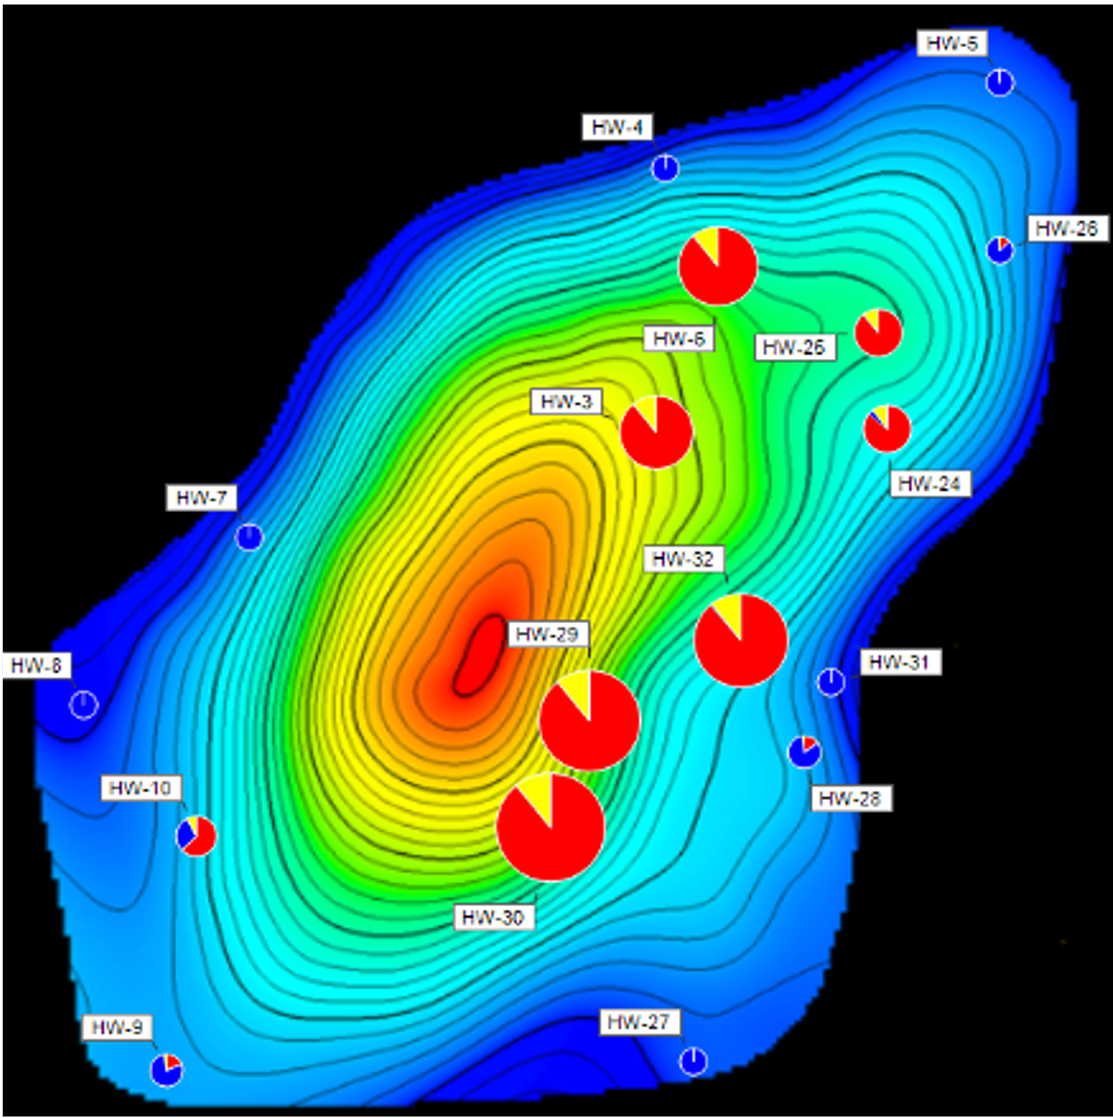


In [2]:
'''
Which Well ?
'''

import panel as pn
pn.extension()

#menu_items = [('Option A', 'a'), ('Option B', 'b'), ('Option C', 'c'), None, ('Help', 'help')]
menu_items_wells = [('HW-3', 'las = lasio.read("./data/HW-3.las");elev_meas_ref = 160'), 
              ('HW-4', 'las = lasio.read("./data/HW-4.las");elev_meas_ref = 29'), 
              ('HW-5', 'las = lasio.read("./data/HW-5.las");elev_meas_ref = 36'), 
              ('HW-6', 'las = lasio.read("./data/HW-6.las");elev_meas_ref = 49'),
              ('HW-7', 'las = lasio.read("./data/HW-7.las");elev_meas_ref = 367'),
              ('HW-8', 'las = lasio.read("./data/HW-8.las");elev_meas_ref = 416'),
              ('HW-9', 'las = lasio.read("./data/HW-9.las");elev_meas_ref = 492'),
              ('HW-10','las = lasio.read("./data/HW-10.las");elev_meas_ref = 397'),
              ('HW-24','las = lasio.read("./data/HW-24.las");elev_meas_ref = 426'),
              ('HW-25','las = lasio.read("./data/HW-25.las");elev_meas_ref = 386'),
              ('HW-26','las = lasio.read("./data/HW-26.las");elev_meas_ref = 375'),
              ('HW-27','las = lasio.read("./data/HW-27.las");elev_meas_ref = 453'),
              ('HW-28','las = lasio.read("./data/HW-28.las");elev_meas_ref = 430'),
              ('HW-29','las = lasio.read("./data/HW-29.las");elev_meas_ref = 466'),
              ('HW-30','las = lasio.read("./data/HW-30.las");elev_meas_ref = 590'),
              ('HW-31','las = lasio.read("./data/HW-31.las");elev_meas_ref = 417'),
              ('HW-32','las = lasio.read("./data/HW-32.las");elev_meas_ref = 441'),              
              None, ('Help', 'help')]

menu_button = pn.widgets.MenuButton(name='Choose Well', items=menu_items_wells, button_type='primary')

pn.Column(menu_button, height=200)


text = pn.widgets.TextInput(value='las = lasio.read("./data/HW-10.las");elev_meas_ref = 397')

#def b(event):
#    text.value = f'Chose well: "{event.new}"'

def b(event):
    text.value = f'{event.new}'
    #text.value = exec.event.new
    
    #text.value = f'Chose well: "{event.new}"'    
    
menu_button.on_click(b)

pn.Row(menu_button, text, height=200)





Row(height=200)
    [0] MenuButton(button_type='primary', items=[('HW-3', 'las = lasio.rea...], name='Choose Well')
    [1] TextInput(value='las = lasio.read("./data/...)

# *START POINT 1:*
## If just selecting well, but it will reset all log analysis parameters to field default values below
## If you have made changes to the petrophysical log analysis parameters too, then go to START POINT 2


## After selecting the well from the above drop down menu, then please click on THIS CELL and then run all cells below using the following
- After choosing the well above from the widget, then come to this cell and use:
    - In Jupyter Notebook use **Cells: "Run all below"**
    - in JupyterLab use **Run: "Run Selected Cells and All Below"**


>![Run](cells_run_below.png)


In [145]:
"""
# =============================================================================
# # ======================================================================= # #
# # # 
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""


#select the proper Neutron-Denisity Chartbook file
''' 
    Schlumberger CNL Neutron Log at different Fluid Densities
'''
#file = r'./data/CNL_1pt0.xlsx'
#file = r'./data/CNL_1pt1.xlsx'
''' 
    Schlumberger TNPH Neutron Log at different Fluid Densities
'''
#file = r'./data/TNPH_1pt0.xlsx'
#file = r'./data/TNPH_1pt19.xlsx'



#menu_items = [('Option A', 'a'), ('Option B', 'b'), ('Option C', 'c'), None, ('Help', 'help')]
menu_items_neu = [('CNL, FD=1.0'   , "file = r'./data/CNL_1pt0.xlsx'"), 
              ('CNL,FD=1.1'    , "file = r'./data/CNL_1pt1.xlsx'"), 
              ('TNPH, FD=1.0'  , "file = r'./data/TNPH_1pt0.xlsx'"), 
              ('TNPH, FD=1.19' , "file = r'./data/TNPH_1pt19.xlsx'"),
               None, ('Help', 'help')]

menu_button = pn.widgets.MenuButton(name='Choose Neutron-Density Tool', items=menu_items_neu, button_type='primary')

pn.Column(menu_button, height=200)


text_neutron = pn.widgets.TextInput(value="file = r'./data/CNL_1pt1.xlsx'")

#def b(event):
#    text.value = f'Chose well: "{event.new}"'

def c(event):
    text_neutron.value = f'{event.new}'
    #text.value = exec.event.new
    
    #text.value = f'Chose well: "{event.new}"'    
    
menu_button.on_click(c)

pn.Row(menu_button, text_neutron, height=150)




Row(height=150)
    [0] MenuButton(button_type='primary', items=[('CNL, FD=1.0', ...], name='Choose Neutron-Density T...)
    [1] TextInput(value="file = r'./data/CNL_1pt1....)

In [146]:

'''
# ==============================================================================
#  # ===========================================================================
#  # #--------------------------------------------------------------------------
# 
#      Lithology Option for either Calcite_Dolomite or Quartz_Calcite_Dolomite
#      
#        Also Illite Option ('yes' or 'no')
#
#        Don't forget the Electrical Properties too
# 
#  # #--------------------------------------------------------------------------
#  # ===========================================================================
# ==============================================================================
'''
#lith_option =  'Calcite_Dolomite'    
#lith_option =  'Quartz_Calcite_Dolomite'     


#menu_items = [('Option A', 'a'), ('Option B', 'b'), ('Option C', 'c'), None, ('Help', 'help')]
menu_items_lith = [('Calcite_Dolomite'        , 'Calcite_Dolomite'), 
              ('Quartz_Calcite_Dolomite' , 'Quartz_Calcite_Dolomite'), 
              None, ('Help', 'help')]

menu_button = pn.widgets.MenuButton(name='Choose Lithology Option', items=menu_items_lith, button_type='primary')

pn.Column(menu_button, height=200)


text_lith = pn.widgets.TextInput(value='Calcite_Dolomite')

#def b(event):
#    text.value = f'Chose well: "{event.new}"'

def d(event):
    text_lith.value = f'{event.new}'
    #text.value = exec.event.new
    
    #text.value = f'Chose well: "{event.new}"'    
    
menu_button.on_click(d)

pn.Row(menu_button, text_lith, height=100)

Row(height=100)
    [0] MenuButton(button_type='primary', items=[('Calcite_Dolomite', ...], name='Choose Lithology Option')
    [1] TextInput(value='Calcite_Dolomite')

In [147]:
'''
Illite Option
'''

#mycode_lith = text_lith.value
#exec(mycode_lith)
#lith_option

#illite_option = 'yes'
#illite_option = 'no'


illite_group = pn.widgets.RadioBoxGroup(name='Illite Option', options=['yes', 'no'], inline=True)

illite_group

RadioBoxGroup(inline=True, name='Illite Option', options=['yes', 'no'], value='yes')

In [148]:
# =================================================================================
#       Archie Saturation Constants
# =================================================================================
text_input_rw = pn.widgets.FloatSlider(name='Rw', start=0.012, end=0.5, step=0.001, value=0.012)
text_input_m = pn.widgets.FloatSlider(name='m', start=1, end=3.0, step=0.01, value=2.0)
text_input_n = pn.widgets.FloatSlider(name='n', start=1, end=3.0, step=0.01, value=2.0)

# =================================================================================
#       Capillary Pressure Parameters
# =================================================================================
text_input_ift = pn.widgets.FloatSlider(name='IFT*Cos(theta', start=6, end=30.0, step=1.0, value=12.0)
text_input_rho_f = pn.widgets.FloatSlider(name='rho_f', start=0.9, end=1.2, step=0.01, value=1.135)
text_input_rho_hc = pn.widgets.FloatSlider(name='rho_hc', start=0.1, end=1.0, step=0.01, value=0.837)

# =================================================================================
#       FWL Search Upper and Lower limits
# =================================================================================
text_input_fwlupper = pn.widgets.FloatSlider(name='FWL Upper Estimate', start=8000, end=10000, step=20, value=8100)
text_input_fwllower = pn.widgets.FloatSlider(name='FWL Lower Estimate', start=8000, end=10000, step=20, value=8300)


# Log Analysis Parameters:

In [149]:
text_input_rw

FloatSlider(end=0.5, name='Rw', start=0.012, step=0.001, value=0.012)

In [150]:
text_input_m

FloatSlider(end=3.0, name='m', start=1, step=0.01, value=2.0)

In [151]:
text_input_n

FloatSlider(end=3.0, name='n', start=1, step=0.01, value=2.0)

# Capillary Pressure Parameters:

In [152]:
text_input_ift

FloatSlider(end=30.0, name='IFT*Cos(theta', start=6, step=1.0, value=12.0)

In [153]:
text_input_rho_f

FloatSlider(end=1.2, name='rho_f', start=0.9, step=0.01, value=1.135)

In [154]:
text_input_rho_hc

FloatSlider(name='rho_hc', start=0.1, step=0.01, value=0.837)

# Free Water Level (FWL) Upper and Lower limits for FWL Search routine:

In [155]:
text_input_fwlupper

FloatSlider(end=10000, name='FWL Upper Estimate', start=8000, step=20, value=8100)

In [156]:
text_input_fwllower

FloatSlider(end=10000, name='FWL Lower Estimate', start=8000, step=20, value=8300)

# *START POINT 2:* 
**if any changes were made to the above parameters**

In [157]:
rw = text_input_rw.value
m  = text_input_m.value
n  = text_input_n.value
tcosthetaww  = text_input_ift.value
rho_f  = text_input_rho_f.value
FD = rho_f
rho_hc = text_input_rho_hc.value
FWL_UPPER_ESTIMATE  = text_input_fwlupper.value
FWL_LOWER_ESTIMATE  = text_input_fwllower.value

print('Rw =',rw,',  m =',m,',  n =',n,',  tcosthetaww =',tcosthetaww,',  rho_f =',rho_f, ',  rho_hc =',rho_hc, ',  FWL_UPPER_ESTIMATE =', FWL_UPPER_ESTIMATE,',  FWL_LOWER_ESTIMATE =', FWL_LOWER_ESTIMATE)

Rw = 0.012 ,  m = 2.0 ,  n = 2.0 ,  tcosthetaww = 12.0 ,  rho_f = 1.135 ,  rho_hc = 0.837 ,  FWL_UPPER_ESTIMATE = 8100 ,  FWL_LOWER_ESTIMATE = 8300


In [158]:
text.value

'las = lasio.read("./data/HW-8.las");elev_meas_ref = 416'

In [159]:
mycode_neutron = text_neutron.value
exec(mycode_neutron)

df_chart = pd.read_excel(file,index_col=False)


CNL_chart  = df_chart['Neutron']
RHOB_chart = df_chart['RHOB']
Rho_Matrix_chart  = df_chart['Rho_Matrix']
Porosity_chart = df_chart['Porosity']     


text_neutron.value

"file = r'./data/CNL_1pt1.xlsx'"

In [160]:
lith_option = text_lith.value
lith_option

'Calcite_Dolomite'

In [161]:
illite_option = illite_group.value
illite_option

'yes'



**This Jupyter Notebook presents the Python Code and Documentation for a typical Carbonate Reservoir Characterization Workflow including the calculations of Chartbook Porosity, Lithology using Scipy Optimization and kNN estimations for Permeability and Thomeer Capillary Pressure (Pc) Parameters. The last step is to calculate Pc-based Bulk Volume Oil (BVO) based on the height above the Free Water Level (FWL) and formation fluid density differences to account for buoyancy. Accurate BVO is the results of level-by-level changes in the Thomeer parameters and Capillary Pressure curves at each level:**

![Geolog_Image](Costa_field_characterization.gif)


In [162]:
'''
 After running above cell, then select the well you want and then click run again to load the well data 
 with Lasio:
 
 You can also just choose the well above on subsequent runs and runn all cells below for another well
 
 Below we load the chosen well into lasio
'''

mycode = text.value
exec(mycode)

text.value

'las = lasio.read("./data/HW-8.las");elev_meas_ref = 416'

**Well Header Data:**

---


## Read In Well Log Data from las File using Lasio

**The following section loads the Well Log Data using Lasio Created by Andy McDonald.** 
  
This portion of the notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

In [163]:
text.value

'las = lasio.read("./data/HW-8.las");elev_meas_ref = 416'

## Interrogate your las data:

In [164]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

 (STRT): 8155.0
 (STOP): 8816.0
 (STEP): 0.5
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): HW-8
FIELD (FLD): COSTA
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2018-02-06 14:55:38   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): HW-8
API NUMBER (API): 


In [165]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
GR
RHOB
NPHI
DT
PHIE
RT
SW
SO
CORE_POR
CORE_PERM


In [166]:
las.keys()

['DEPT',
 'GR',
 'RHOB',
 'NPHI',
 'DT',
 'PHIE',
 'RT',
 'SW',
 'SO',
 'CORE_POR',
 'CORE_PERM']

In [167]:
df_log = las.df()

In [168]:
df_log.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8621.0,35.26,2.70,0.04,NaN,0.03,13.86,NaN,NaN,0.7,0.01
8621.5,36.26,2.69,0.04,NaN,0.03,13.04,NaN,NaN,0.7,0.01
8622.0,37.25,2.69,0.04,NaN,0.03,13.69,NaN,NaN,0.7,0.01
8622.5,36.65,2.69,0.04,NaN,0.03,15.62,NaN,NaN,0.7,0.01
8623.0,36.04,2.69,0.04,NaN,0.03,17.36,NaN,NaN,0.7,0.01


In [169]:
df_log['GR']

DEPT
8621.0    35.26
8621.5    36.26
8622.0    37.25
8622.5    36.65
8623.0    36.04
          ...  
8814.0      NaN
8814.5      NaN
8815.0      NaN
8815.5      NaN
8816.0      NaN
Name: GR, Length: 391, dtype: float64

In [170]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: ft, Description: DEPTH
Curve: GR, Units: gAPI, Description: GR
Curve: RHOB, Units: g/cm3, Description: RHOB
Curve: NPHI, Units: ft3/ft3, Description: NPHI
Curve: DT, Units: us/ft, Description: DT
Curve: PHIE, Units: ft3/ft3, Description: PHIE
Curve: RT, Units: ohm.m, Description: RT
Curve: SW, Units: , Description: SW
Curve: SO, Units: , Description: SO
Curve: CORE_POR, Units: ft3/ft3, Description: CORE_POR
Curve: CORE_PERM, Units: mD, Description: CORE_PERM
There are a total of: 11 curves present within this file


In [171]:
df_log.describe()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
count,378.000000,378.000000,378.000000,0.0,378.000000,377.000000,31.000000,31.000000,353.000000,353.000000
mean,13.761931,2.405556,0.167328,NaN,0.175582,6.331141,0.832903,0.167097,17.459207,8.789915
std,6.842152,0.149124,0.079967,NaN,0.084262,14.140871,0.176374,0.176374,8.130424,36.653346
min,8.050000,2.250000,0.010000,NaN,0.000000,0.190000,0.400000,0.010000,0.400000,0.010000
25%,10.382500,2.290000,0.120000,NaN,0.130000,0.250000,0.740000,0.035000,12.750000,0.190000
50%,11.215000,2.345000,0.190000,NaN,0.210000,0.390000,0.910000,0.090000,20.100000,1.060000
75%,13.080000,2.470000,0.240000,NaN,0.250000,1.660000,0.965000,0.260000,24.100000,2.330000
max,37.250000,2.720000,0.260000,NaN,0.260000,60.900000,0.990000,0.600000,28.200000,383.680000


In [172]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 391 entries, 8621.0 to 8816.0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         378 non-null    float64
 1   RHOB       378 non-null    float64
 2   NPHI       378 non-null    float64
 3   DT         0 non-null      float64
 4   PHIE       378 non-null    float64
 5   RT         377 non-null    float64
 6   SW         31 non-null     float64
 7   SO         31 non-null     float64
 8   CORE_POR   353 non-null    float64
 9   CORE_PERM  353 non-null    float64
dtypes: float64(10)
memory usage: 33.6 KB


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [173]:
well_nan = df_log.notnull() * 1

In [174]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8621.0,1,1,1,0,1,1,0,0,1,1
8621.5,1,1,1,0,1,1,0,0,1,1
8622.0,1,1,1,0,1,1,0,0,1,1
8622.5,1,1,1,0,1,1,0,0,1,1
8623.0,1,1,1,0,1,1,0,0,1,1


We can now create a summary plot of the missing data.



HW-8


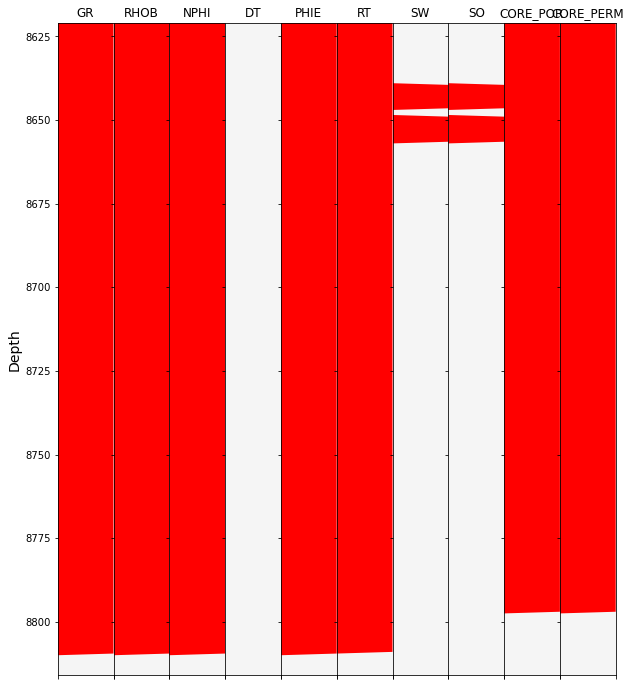

In [175]:
fig = plt.subplots(figsize=(10,12))
wellname=las.well.well.value
print()
print()
print(wellname)
#fig.suptitle('Data Extent: %s'%wellname, fontsize=24, color='blue')
#fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)



#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)


columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)

plt.show()

## Assign log curves from las file:

In [176]:
Dep = las['DEPT']
CNL  = las['NPHI']
RHOB = las['RHOB']
#RHOMAA = las['RHOMAA']
Porosity = las['PHIE']
gr       = las['GR']
ild      = las['RT']

---
---
# Costa's Carbonate Reservoir Characterization Workflow being used in this Notebook:

In this GitHub repository we have used a new, comprehensive reservoir characterization database from Costa, Geiger and Arnold(1) We employed all the available well logs, Routine Core Analysis (RCA) and Special Core Analysis (SCAL and implemented our normal carbonate reservoir characterization workflow as discussed by Phillips (2). For this repository we did not use the 3D static or dynamic models, but we did use the time-series dynamic production and formation pressure data by well in Spotfire to better understand the dynamic aspects of the reservoir too. This is a rich dataset that needs to be explored further, more than what is presented in the scope of this project. 

The RCA and SCAL core data as well as the 17 well logs provided as las files were used extensively in our Petrophysical evaluation. These data are all in a Geolog project that is included in this repository. The following layout depth plot display shows a typical well from the field and the analysis performed on each well. 

![Geolog_Image](Results.png)

The process used in this repository follows a tried and proven workflow as described by Phillips et al. (2) in the characterization of an Arab D carbonate reservoirs from Saudi Arabia. Core Porosity, Permeability, Petrophysical Rock Types (PRT), Capillary Pressure and capillary pressure-based saturations are all estimated or calculated within this workflow. Just as in previous studies, the core analysis database was used extensively as the foundation and calibration to these petrophysical interpretations. 

Costa provided 110 High Pressure Mercury Injection (HPMI) core samples with RCA Porosity and Permeability. We performed Thomeer Parameter Analysis on each HPMI sample to establish our own, reservoir specific Thomeer Parameter Capillary Pressure core database used to mode saturations. In Geolog we fit the Thomeer hyperbola to all 110 HPMI samples and established the Thomeer parameters for each sample. We used python loglan code to load the High-Pressure Mercury Injection (HPMI) Core data directly from the Costa SCAL dataset into a Geolog Well and then modeled the HPMI data using the Thomeer parameters fitting the Thomeer hyperbola to each HPMI sample. This portion of the Geolog project serves an example as to how to build your own reservoir-specific core calibration database for their own Reservoir Characterization studies. 

![Geolog_Image]( Thomeer_Parameter_fitting.gif)

### Suggested Carbonate Workflow:
The following workflow and processing are suggested to interrogate, process, interpret and model the petrophysical properties for this benchmark carbonate reservoir using Costa's RCA and High-Pressure Mercury Injection core database as calibration. The workflow consists of the following steps:

1) Interrogate the Well Log data and Costa calibration data using standard Geolog layouts, cross plots, and histograms; and then use a python loglan featuring Altair, which is interactive software driven from a Geolog Module Launcher.

##### Altair used to Interrogate the Costa Capillary Pressure curves and Petrophysical Rock Types (PRTs):

![Geolog_Image](Costa_Pc2.gif)

2) Normally we would run MultiMin for a solid log analysis model using the typical minerals found in this reservoir; Limestone, Dolomite, and Illite. With MultiMin we always use environmentally corrected log data, calculating the uncertainties for each log curve employed in the analysis. However, to make this dataset more universal, we have employed python to perform our deterministic log analysis of the 17 HW wells. This code is provided in the Geolog project. We received these data as las files with a text file of log header data including X,Y locations, KB elevation and TD.  There were no directional survey data provided, so at this point we are assuming these wells to be vertical, and TVDss was calculated accordingly. 

3) Use available core data from the representative reservoir/field to build a petrophysical model to estimate permeability for all wells in field using Geolog's Facimage. Our plan is to include a python loglan too using kNN with normalized input data that is weighted by Euclidean distances for each of the nearest neighbors to estimate permeability for each well. 

4) Using the kNN estimated permeability and calculated Total Porosity (PHIT) from our log analysis, we queried Costa's core database to predict the following Petrophysical results:

- Thomeer Capillary Pressure parameters (Pdi, Gi and BVocci) for each pore system, i, over the entire reservoir interval for Capillary Pressure-based saturations
- Estimate the most dominant pore throat diameter at each level in the well calculated from the Thomeer parameters G and Pd. This exact mode of the pore throat distribution is calculated using the following equation:

	 	*Mode of Pore Throat Distribution (microns) = exp(-1.15 * G1) * (214/Pd1)*

This exact Mode of the Pore Throat Distribution (PTD) is what Winland is trying to accomplish with r35 and Amaefule with FZI; however, they are not exact. The Mode of the PTD calculated from the Buiting equation is taken directly from the Capillary Pressure data and is the exact mode that correlates to other petrophysical parameters extremely well. 

We used this mode to partition our data into Petrophysical Rock Types. If the Mode > 2 microns, then the PRT was a Macro porous rock. If the Mode > 0.1 micron and less that 2 microns, then this was Meso porous rock. If the Mode < 0.1 microns, then this rock was Micro porous rock.


5) Use the Thomeer Capillary Pressure parameters to model saturations based on the buoyancy due to fluid density differences at the height above the Free Water Level (FWL). In this instance we compare the Bulk Volume Oil (BVO) from our analysis vs. BVO from Thomeer-based capillary pressure saturations. We have used BVO since BVO is pore volume weighted, and Sw is not.

We did perform a Free Water Level (FWL) search for each well. We use the Thomeer parameters to model Capillary Pressure based saturations as shown below:

![Geolog_Image](Thomeer_sats.png)

We vary the FWL from the highest potential FWL elevation down to the lowest potential FWL elevation for the reservoir and pick the FWL where the error between the BVO on logs vs. Capillary Pressure are at a minimum. 

![Geolog_Image](fwl_search.gif)

This is an example of the single well output from a typical FWL search. The FWL search was performed on all wells in the study.

![Geolog_Image](FWLSearch.png)

Not all wells are useful in establishing the FWL. A few of the wells were too high where all we really were estimating was the Base of Reservoir (BOR) for those wells. There were also a few wells that were near 100% wet, and they were not used to establish the FWL surface. Eliminating these wells allowed us to establish the following FWL surface for this reservoir:

![Geolog_Image](FWL_Surface.png)

Our estimated FWL surface is a plane but tilted with a high of 8178 feet TVDss on the West dipping to the East to a maximum FWL elevation of 8214 feet TVDss. Tilted FWL’s are quite prevalent in Saudi Arabia due to dynamic aquifer pressures, tilted structures and even subduction. This FWL Surface was then used with the estimated Thomeer parameters on each well to calculate the final Capillary Pressure based saturations for each well. 



---
### RESOURCES:
https://researchportal.hw.ac.uk/en/datasets/costa-model-hierarchical-carbonate-reservoir-benchmarking-case-st

https://github.com/Philliec459/Geolog-Used-to-Model-Thomeer-Parameters-from-High-Pressure-Mercury-Injection-Data

https://github.com/Philliec459/Geolog-Used-to-Automate-the-Characterization-Workflow-using-Clerkes-Rosetta-Stone-calibration-data

### REFERENCES:
1.  Costa Gomes J, Geiger S, Arnold D. The Design of an Open-Source Carbonate Reservoir Model. Petroleum Geoscience, 
    https://doi.org/10.1144/petgeo2021-067
2.  Phillips, E. C., Buiting, J. M., Clerke, E. A, “Full Pore System Petrophysical Characterization Technology for Complex Carbonate Reservoirs – Results from Saudi Arabia”, AAPG, 2009 Extended Abstract.
3.  Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October 2008. 
 

 
# The following is a summary of the workflow process:

# Chart Book Neutron/Density Porosity using kNN and then Scipy Optimization used to Estimate Lithology:

### The objective of this portion of the project is to calculate a Neutron log vs. Bulk Density log Cross-Plot Total porosity using the Schlumberger CNL or TNPH Charts as shown below. It is important to use the proper Neutron chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix units with these charts. 

![CNL_Image](CNL.png)

![TNPH_Image](TNPH.png)

###  This program uses as training data Neutron Porosity (V/V) vs. Bulk Density (G/CC) with porosities taken from the actual charts). The chartbook porosity estimations are made using kNN. We normalize the Neutron porosity and Bulk Density curves before making any Euclidian distance calculations, and then use a kNN of 3 to estimate the Cross-Plot porosity values from our data set.   

![SMatrixCNL_Image](Matrix_CNL2.png)

![Matrix_TNPH.png](Matrix_TNPH.png)

### This program has been tested for the charts available showing good agreement with the training data for the calculated porosities. Further testing is recommended before using this program to better understand the uncertainties in the estimations and validate using a KNN of 3. 

### We have 4 sets of chart files representing 4 of the Schlumberger charts: 2 fluid densities for CNL and 2 for TNPH. Other vendor charts will also be included as needed in the future. 

### Cross Plot data with Porosity or Rho Matrix on Color axis:

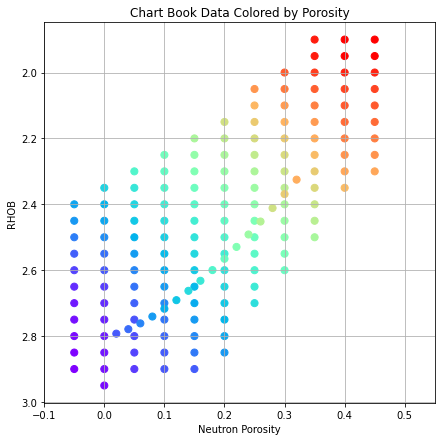

In [177]:
plt.figure(figsize=(7,7))    
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn",)
#plt.scatter(CNL_chart, RHOB_chart, s=50, c=Porosity_chart)
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn")
plt.scatter(CNL_chart, RHOB_chart, s=50, c = Porosity_chart, cmap = "rainbow")
plt.xlim(-0.1, 0.55)
plt.gca().invert_yaxis()
plt.title("Chart Book Data Colored by Porosity")
plt.ylabel('RHOB')
plt.xlabel('Neutron Porosity')
plt.grid(True)
plt.show()

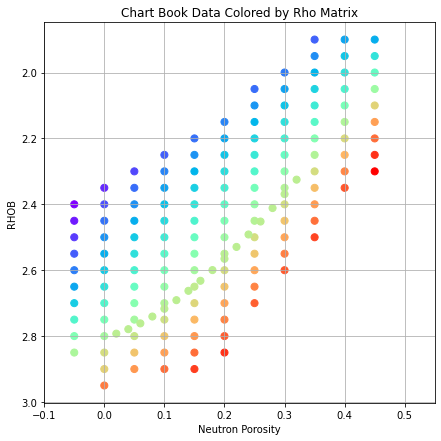

In [178]:
plt.figure(figsize=(7,7))    
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn",)
#plt.scatter(CNL_chart, RHOB_chart, s=50, c=Porosity_chart)
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn")
plt.scatter(CNL_chart, RHOB_chart, s=50, c = Rho_Matrix_chart, cmap = "rainbow")
plt.xlim(-0.1, 0.55)
plt.gca().invert_yaxis()
plt.title("Chart Book Data Colored by Rho Matrix")
plt.ylabel('RHOB')
plt.xlabel('Neutron Porosity')
plt.grid(True)
plt.show()

In [179]:
#for k in range(0,len(df_log) ,1):  
#    RHOMAA[k]=RHOMAA[k]/1000

In [180]:
#print(RHOMAA)

## 2a) kNN Used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:

In [181]:
"""
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of KNN estimating ND xplt Porosity 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
"""  


deptharray = []
porarray   = []; #make list of 0 length
RHOMAA_array = []
Porosity_array = []
rhoarray = []


#log Data
for k in range(0,len(df_log) ,1):  

        cnl_norm  = (CNL[k]-(-0.05))/(0.6-(-0.05))
        rhob_norm = (RHOB[k]-1.9)/(3-1.9)
        


        dist_inv    = []
        dist_cnl    = []
        dist_rhob    = []
        inv_dist_array = []
        Por_weight = []
        Rhomatrix_weight =[]
        CNL_norm = []
        RHOB_norm = []

        dist_inv_total = 0
        Por_total     = 0



        #this is the chartbook_reference_data being used 
        for i in range(0,len(df_chart),1):
        
                CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))
                
                #Euclidian Distance
                dist_cnl.append((abs(cnl_norm   - CNL_norm[i])))
                dist_rhob.append( abs(rhob_norm - RHOB_norm[i]))

                if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                    dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                else:
                    dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )
        
                
                #calculalte weights
                Por_weight      .append(dist_inv[i] * Porosity_chart[i])
                Rhomatrix_weight.append(dist_inv[i] * Rho_Matrix_chart[i])
                
                
        
                inv_dist_array.append(dist_inv[i]);  # add items
        
        # =============================================================================
        ###                    KNN Array
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
                distance_knn_array = [dist_inv, Por_weight, Rhomatrix_weight]
        #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================
        xnorm=np.array(CNL_norm)
        ynorm=np.array(RHOB_norm)
        
            
        #knn_array = np.transpose array
        knn_array = np.transpose(distance_knn_array)
        #print(knn_array)
        
        #Sort array from large to low by column 0 which is dist_inv 
        #xknn=np.array(knn_array)
        
        #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
        mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
        #mat_sort = x[x[:,1].argsort()[::-1]]
        #mat_sort = x[x[:,2].argsort()[::-1]]
        
         
        #------------------------------------------------------------------------------
        #    Number of nearest Neighbors
        #------------------------------------------------------------------------------
        n_neighbors = 3
        #------------------------------------------------------------------------------
        
        dist_inv_total_knn = 0
        por_total_knn      = 0
        rhomatrix_total_knn      = 0
        
        
        
        #kNN Estimates for first 3 rows
        #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
        for i in range(0,n_neighbors,1):
            dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
            por_total_knn  = por_total_knn + mat_sort[i][1]
            rhomatrix_total_knn  = rhomatrix_total_knn + mat_sort[i][2]
        
        
        #back to k values and calculate estimations now
        por_est_knn  = por_total_knn  / dist_inv_total_knn
        rhomatrix_est_knn  = rhomatrix_total_knn  / dist_inv_total_knn
        

#------------------------------------------------------------------------------ 
#            Write Data to arrays
#------------------------------------------------------------------------------
        deptharray.append(Dep[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix


print(len(porarray))

391


## Depth Plot of  PHIT and RHOMAA from kNN Estimations using Chartbook data as calibration:

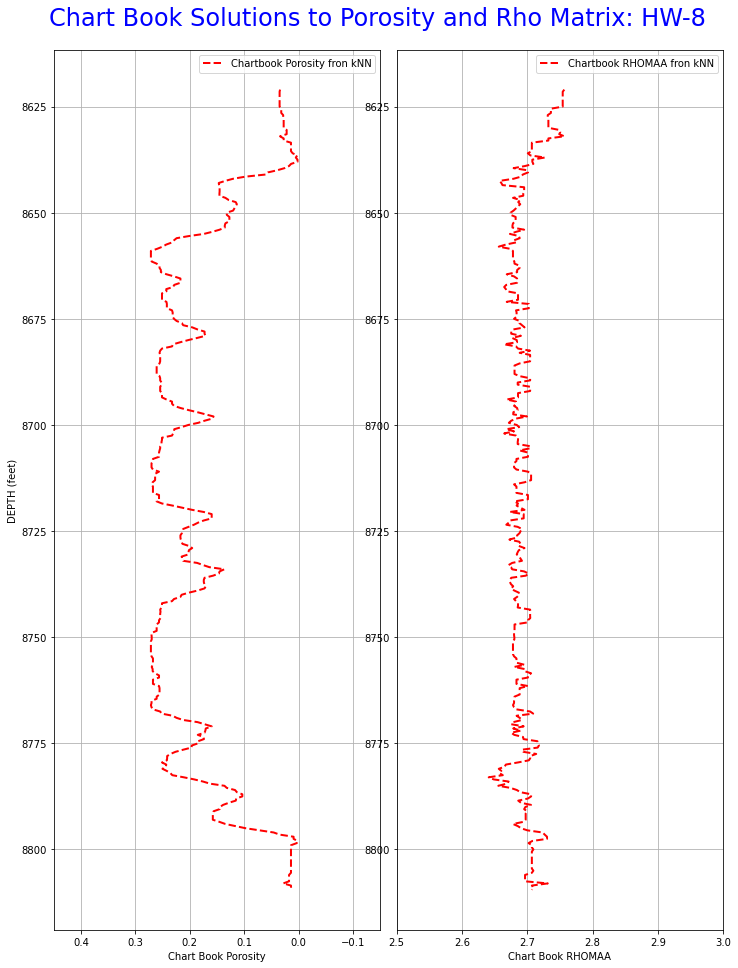

In [182]:
from matplotlib import gridspec

'''     
        deptharray.append(Dep[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix
'''

y=np.array(deptharray)

fig = plt.figure(figsize=(12,15))
#fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix',fontsize=28)
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.3)
wellname=las.well.well.value
fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix: %s'%wellname, fontsize=24, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)





gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])

# Porosity
ax1.plot(porarray, y,'--r',lw=2, label= 'Chartbook Porosity fron kNN')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH (feet)')
#ax11=ax1.twiny()
ax1.set_xlabel("Chart Book Porosity",color='black')
ax1.set_xlim(.45, -0.15)
ax1.legend()


# Rho Matrix
ax2.plot(rhoarray, y,'--r',lw=2, label= 'Chartbook RHOMAA fron kNN')                                                               
#ax2.plot(RHOMAA, y,'-b', lw=1, label= 'RHOMAA from MMin')
ax2.invert_yaxis()
ax2.grid(True)
ax2.set_xlabel("Chart Book RHOMAA",color='black')
ax2.set_xlim(2.5, 3)
ax2.legend()
#ax2.get_yaxis().set_visible(False)
#ax2=ax2.twiny()



# 2b) Optimizing Petrophysics solving for Lithology using Scipy Optimize: 

#### a) Set lith_option to be either Quartz-Calcite-Dolomite or Calcite-Dolomite
#### b) Illite Option: include Illite as Clay (illite_option = 'yes') or Clay-free (illite_option = 'no')

## Scipy Optimization for Lithology:

In [183]:
import scipy.optimize as spo

'''
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            Start Code for Scipy Optimization using minimization
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
'''
VOL_QUARTZ = []
VOL_CALCITE = []
VOL_DOLO = []
porden =[]
VOL_ILLITE = []
tnph = []
bvw = []
bvo=[]
swt = []

rhob_theoretical = []
tnph_theoretical = []
error = []


'''
deptharray.append(Dep[k]);          # Taken from logs
RHOMAA_array.append(RHOMAA[k]);     # Taken from Log data
Porosity_array.append(Porosity[k]); # Taken from log data
porarray.append(por_est_knn);       # Calculated from logs 
rhoarray.append(rhomatrix_est_knn); # Calculated from logs
'''
    
#log Data
for k in range(0,len(df_log) ,1):  

    TNPH    = CNL[k]
    RHOB2   = RHOB[k]
    GR      = gr[k]
    ILD     = ild[k]
    PHIT    = porarray[k]
    RHOMAA2 = rhoarray[k]

    PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

    # =================================================================================
    #       Saturation Calculations
    # =================================================================================
    BVW = PHIT*((1/PHIT**m) * (rw/ILD) )**(1/n)

    if BVW > PHIT:
        BVW=PHIT
    else:
        BVW=BVW

    Swt = BVW/PHIT
    BVO = (PHIT*(1-Swt))
    bvo.append(BVO)
    swt.append(Swt)    
    bvw.append(BVW)    
    
    # =================================================================================
    #       Illite Option Calculations
    # =================================================================================
    if illite_option == 'yes':
        vol_illite = -0.0424035 + 0.00562239*GR
        illite     = vol_illite/(1-PHIT)
    else:
        vol_illite = 0
        illite     = 0

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##         Scipy Optimization for Lithology of Calcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    if lith_option == 'Calcite_Dolomite' :   
        
        # Function to mimimize (-area is to maximize)
        def f(xy):
            x  = xy[0]
            y  = xy[1]
            unity = illite + x + y - 1
            return unity  # -area to maximize

        # Start Guess for x and y [x guess, y guess]
        xy_start = [0.5, 0.5]

        # Bounds x is 0 to 1 and y is 0 to 1
        bnds = ((0, 1.0),(0, 1.0))

        # However if y wide can only be 30' wide then:
        #bnds = ((1, 100),(1, 30))

        # Constraints where lambda is all on one side and not: 2*xy[0] + xy[1] = 100 because of 'eq'
        cons = ({'type':'eq','fun':lambda xy: (((2.52*illite + 2.71*xy[0] + 2.847 *xy[1])*(1-PHIT) +  FD*PHIT)  - RHOB2)},
                {'type':'eq','fun':lambda xy: ((illite       +      xy[0] +        xy[1]) -1)                             }
                #{'type':'eq','fun':lambda xy: ( ( 0 *xy[0]*(1-PHIT)  + 0.05375*xy[1]*(1-PHIT)+      PHIT)   - TNPH)},
               )

        # Optimizing minimize
        result = spo.minimize(f, xy_start, options={"disp":False}, constraints = cons, bounds = bnds)
        xy   = result.x
        x    = xy[0]
        y    = xy[1]

  
        VOL_ILLITE.append(vol_illite)             
        VOL_QUARTZ.append(0)
        VOL_CALCITE.append(x*(1-PHIT))
        VOL_DOLO.append(y*(1-PHIT))

        rhob_theoretical.append(( 2.52*illite  + 2.71*x   +   2.847*y)*(1-PHIT) + FD*PHIT)
        tnph_theoretical.append((0.247*illite  +  0*x     +   0.006*y)*(1-PHIT) +    PHIT)

        #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##       Scipy Optimization for Lithology of Quartz, Cakcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================    
    elif lith_option == 'Quartz_Calcite_Dolomite' :      
        if RHOMAA2 > 2.0:
            # Function to mimimize (-area is to maximize)
            def f(xy):
                x  = xy[0]
                y  = xy[1]
                z  = xy[2]
                unity = illite + x + y + z - 1
                return unity  # -area to maximize

            # Start Guess for x and y [x guess, y guess]
            xy_start = [0.0, 0.0, 0.0]

            # Bounds x is 0 to 1 and y is 0 to 1
            bnds = ((0, 1.0),(0, 1.0),(0, 1.0))

            # However if y wide can only be 30' wide then:
            #bnds = ((1, 100),(1, 30))

            # Constraints where lambda is all on one side and not: 2*xy[0] + xy[1] = 100 because of 'eq'
            cons = ({'type':'eq','fun':lambda xy:(((2.52*illite + 2.65*xy[0]+2.71*xy[1] + 2.847*xy[2])*(1-PHIT) + 1.19*PHIT)-RHOB2)},
                    {'type':'eq','fun':lambda xy:((illite       +      xy[0]+     xy[1] +       xy[2])      -1)                    },
                    #{'type':'eq','fun':lambda xy:(( (-0.05*xy[0]+  0*xy[1]+0.05375*xy[2])*(1-PHIT) +      PHIT)-TNPH)},
                   )

            # Optimizing minimize
            result = spo.minimize(f, xy_start, options={"disp":False}, constraints = cons, bounds = bnds)
            xy = result.x
            x    = xy[0]
            y    = xy[1]
            z    = xy[2]
    
       
            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(x*(1-PHIT))
            VOL_CALCITE.append(y*(1-PHIT))
            VOL_DOLO.append(z*(1-PHIT))
                      
            rhob_theoretical.append((2.520*illite + 2.65*x + 2.71*y + 2.847*z)*(1-PHIT) + FD*PHIT)
            tnph_theoretical.append((0.247*illite - 0.05*x + 0.0*y  + 0.006*z)*(1-PHIT) + PHIT)

            #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     
            
            
            
        else:

            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(1-PHIT)
            VOL_CALCITE.append(0)
            VOL_DOLO.append(0)
            
            rhob_theoretical.append(0)
            tnph_theoretical.append(0)
            error.append(0)       

                       
    porden.append(PORDEN)   
    tnph.append(TNPH)
               
    rhob_norm = (RHOB[k]-1.9)/(3.0-1.9)
    rhob_norm_theo = (rhob_theoretical[k] -1.9)/(3.0-1.9)
    tnph_norm = ( CNL[k] - (-0.05)/(0.6-(-0.05)))
    tnph_norm_theo = (tnph_theoretical[k] -(-0.05))/(0.6-(-0.05))     

    error.append(0.5*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo))/(PHIT))


## Optimization Petrophysical Results Depth Plot:

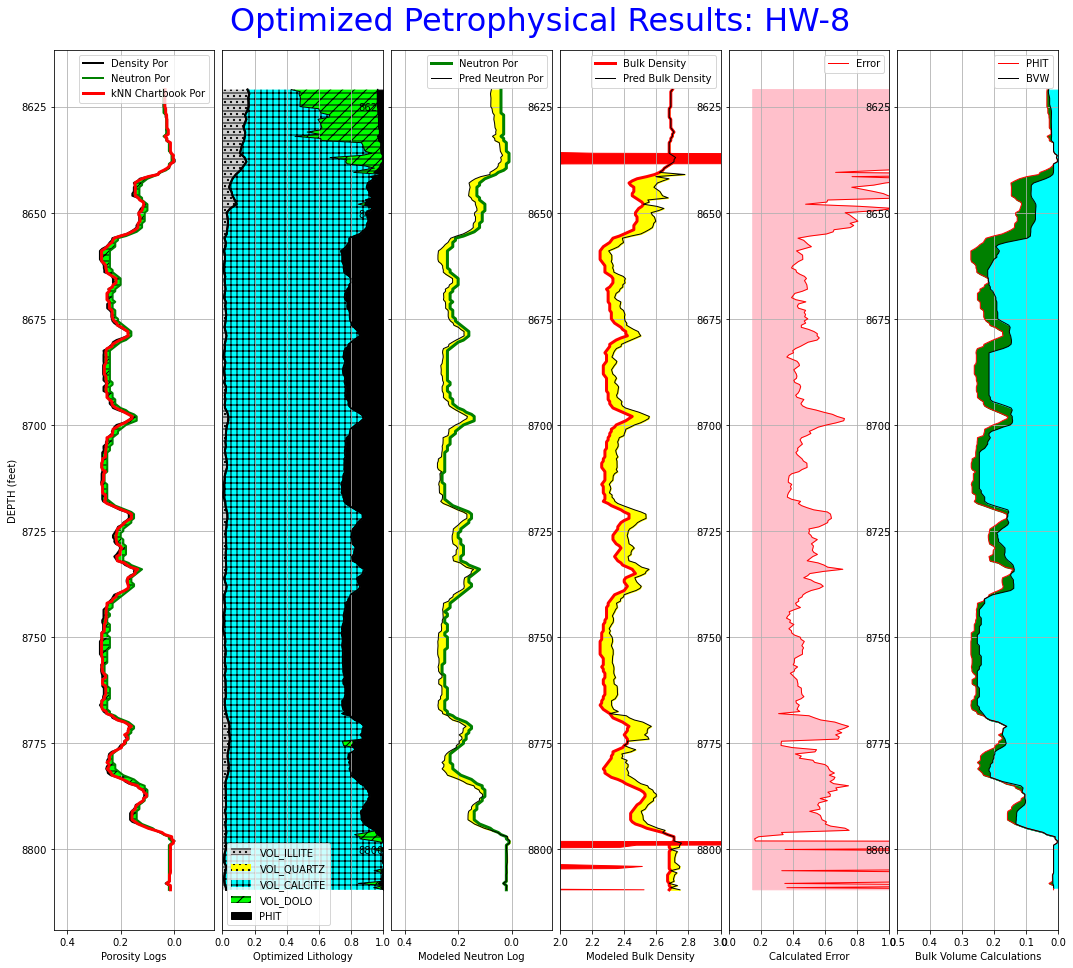

In [184]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Optimized Petrophysical Results',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Optimized Petrophysical Results: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)




gs = gridspec.GridSpec(1, 6)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])


y=np.array(deptharray)


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)


# Modeled Neutron Log
ax3.plot(CNL, y,'-g', lw=3, label= 'Neutron Por')
ax3.plot(tnph_theoretical, y,'-k',lw=1, label= 'Pred Neutron Por')
ax3.set_xlabel("Modeled Neutron Log",color='black')
ax3.set_xlim(.45, -0.15)
ax3.fill_betweenx(y,CNL,tnph_theoretical, color='yellow')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)
#ax3.set_ylabel('DEPTH (feet)')

# Modeled Density Log
ax4.plot(RHOB, y,'-r', lw=3, label= 'Bulk Density')
ax4.plot(rhob_theoretical, y,'-k',lw=1, label= 'Pred Bulk Density')
ax4.set_xlabel("Modeled Bulk Density",color='black')
ax4.set_xlim(2, 3)
ax4.fill_betweenx(y,RHOB,rhob_theoretical, color='yellow')#, label= 'VOL_DOLO')
ax4.fill_betweenx(y,error,0, color='red')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')

# Error Theoretical vs. Actual normalized logs
ax5.plot(error, y,'-r', lw=1, label= 'Error')
ax5.set_xlabel("Calculated Error",color='black')
ax5.set_xlim(0, 1.0)
ax5.fill_betweenx(y,error,0.15, color='pink')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)



## 3) Permeability Estimations from kNN:
### Import the Permeability calibration data and then make the Perm estimations.

In [185]:
#!/usr/bin/env python3
# python loglan

# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #        Read in Reference HW data (_r) from Excel file
# # #        Read in the reference Core data 
# # #        
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#read the Excel .xlsx file 
file = r'./data/HW_Phit_Rhob_GR_Perm.xlsx'
core_data = pd.read_excel(file,index_col=False)
core_data = core_data.replace(-999.25,np.nan)


Por_r   = core_data['PHIT']
Rhob_r  = core_data['RHOB']
GR_r    = core_data['GR']
Kair_r  = np.log10(core_data['PERMEABILITY'])

#print(gr)

In [186]:
n_neighbors = 3

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #
# # #            This is the beginnin of kNN for Permeability Estimations
# # #
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
    
#porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
#permarray  = []
perm = []

#print(len(porarray),len(swt))



# Load data from geolog
#while geolog.getrow():
for k in range(0,len(df_log) ,1):  


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #            Read in log data 
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    Por = porarray[k]
    Rhob = RHOB[k]
    GR   = gr[k]


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginnin of kNN for Permeability Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
        
    permarray  = []

    inv_dist_array = []
    distance_knn_array = []


    #for k in range(0,len(NMR_data) ,1):  
    por_norm = ((Por -  0)/(.4 - 0))
    rhob_norm = (Rhob-2)/(3-2)
    gr_norm   = (GR - 0)/(100-0)

    dist_inv    = []
    dist_phi    = []
    dist_rhob   = []
    dist_gr     = []
    Perm_weight = []
    Por_r_norm  = []
    Rhob_r_norm = []
    GR_r_norm   = []

    dist_inv_total = 0
    Perm_total     = 0
    
    
    
    #this is the reference_data being used with kNN
    for i in range(0,len(core_data),1): 

        # Normalize the core reference data of Por_r and swt_r
        Por_r_norm.append((Por_r[i]   -  0)/(0.4 - 0))
        Rhob_r_norm.append((Rhob_r[i] -  2)/(3   - 2))
        GR_r_norm.append((GR_r[i]     -  0)/(100 - 0))
         
                              
        # Compute Euclidian Distance inverse distance
        dist_phi.append(abs(por_norm - Por_r_norm[i]))
        dist_rhob.append(abs(rhob_norm - Rhob_r_norm[i]))
        dist_gr.append(abs(gr_norm - GR_r_norm[i]))
        dist_inv.append(1/(math.sqrt(dist_phi[i]**2 + dist_rhob[i]**2 + dist_gr[i]**2) + 0.0000001))

        # Calculalte inverse distance weights for perm
        Perm_weight.append(dist_inv[i]  * Kair_r[i])
        inv_dist_array.append(dist_inv[i]);  # add items

        # =============================================================================
        ###                    KNN Array for all data
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, Perm_weight]
        #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Transpose and Sort kNN array
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)

    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Calculate knn Thomeer Parameters
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #------------------------------------------------------------------------------
    #    Number of nearest Neighbors set in loglan constans
    #------------------------------------------------------------------------------
    #n_neighbors = 3
    #------------------------------------------------------------------------------

    dist_inv_total_knn = 0
    Perm_total_knn = 0


    #kNN Estimates for first n rows

    for i in range(0,n_neighbors,1):
        dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
        Perm_total_knn  = Perm_total_knn + mat_sort[i][1]

    #back to k values and calculate estimations now
    perm_est_knn = (10**(Perm_total_knn  / dist_inv_total_knn))
    
    if perm_est_knn < 0.001:
        perm_est_knn = 0.001
        
    perm.append(perm_est_knn)
  
print(len(perm))

391


## Depth Plot of Porosity with Optimized Carbonate Lithology and kNN Permeability:

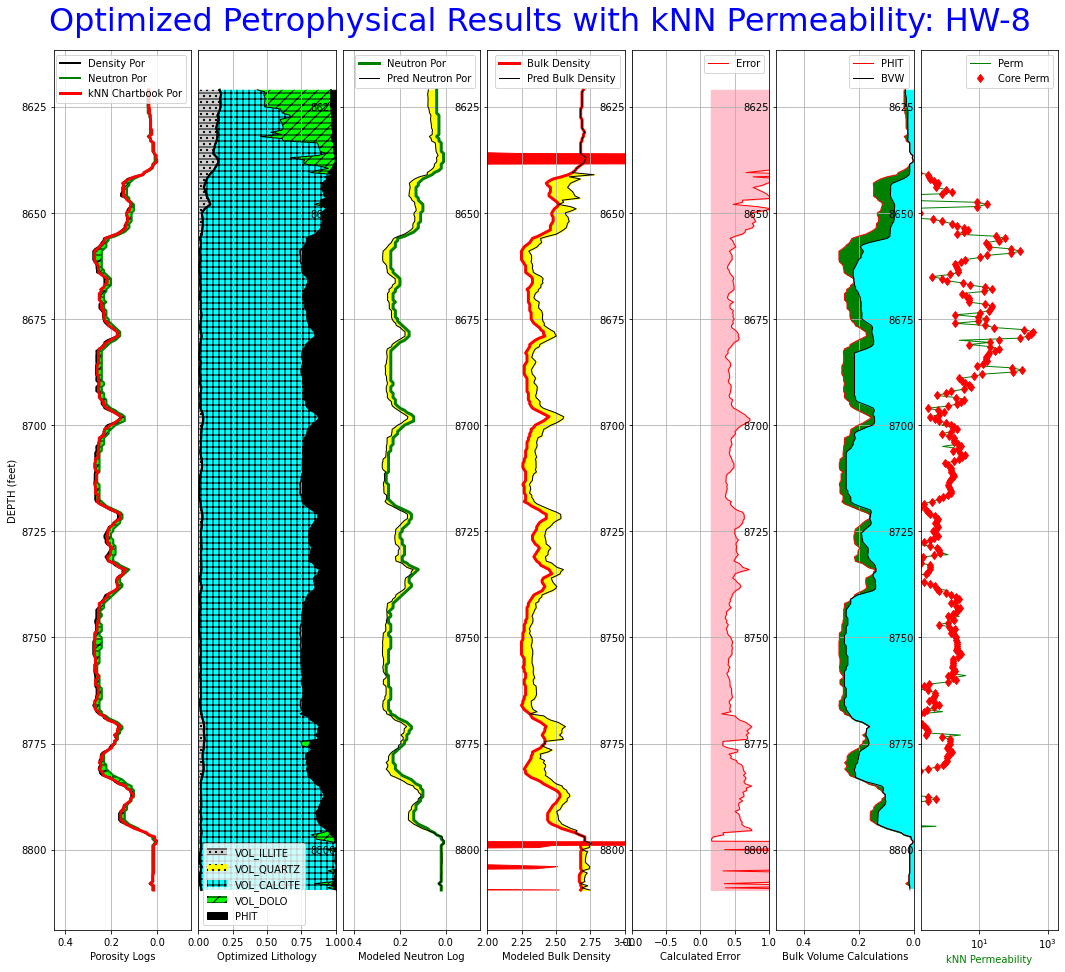

In [187]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Optimized Petrophysical Results with kNN Permeability',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Optimized Petrophysical Results with kNN Permeability: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)




gs = gridspec.GridSpec(1, 7)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])

y=np.array(deptharray)


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)


# Modeled Neutron Log
ax3.plot(CNL, y,'-g', lw=3, label= 'Neutron Por')
ax3.plot(tnph_theoretical, y,'-k',lw=1, label= 'Pred Neutron Por')
ax3.set_xlabel("Modeled Neutron Log",color='black')
ax3.set_xlim(.45, -0.15)
ax3.fill_betweenx(y,CNL,tnph_theoretical, color='yellow')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)
#ax3.set_ylabel('DEPTH (feet)')

# Modeled Density Log
ax4.plot(RHOB, y,'-r', lw=3, label= 'Bulk Density')
ax4.plot(rhob_theoretical, y,'-k',lw=1, label= 'Pred Bulk Density')
ax4.set_xlabel("Modeled Bulk Density",color='black')
ax4.set_xlim(2, 3)
ax4.fill_betweenx(y,RHOB,rhob_theoretical, color='yellow')#, label= 'VOL_DOLO')
ax4.fill_betweenx(y,error,0, color='red')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')

# Error Theoretical vs. Actual normalized logs
ax5.plot(error, y,'-r', lw=1, label= 'Error')
ax5.set_xlabel("Calculated Error",color='black')
ax5.set_xlim(-1.0, 1.0)
ax5.fill_betweenx(y,error,0.15, color='pink')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)

# Permeability
ax7.semilogx(perm, y,'-g', lw=1, label= 'Perm')
ax7.semilogx(df_log['CORE_PERM'], y,'rd', lw=1, label= 'Core Perm')
ax7.set_xlabel("kNN Permeability",color='green')
ax7.set_xlim(0.2, 2000.0)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)

# 4) Estimate Thomeer Parameters using kNN to Calculate Capillary Pressure Saturations:
### Read in Rosetta Stone HPMI Thomeer Parameter Reference Calibration Data.

In [188]:
#read the Excel .xlsx file - slow
#file = r'./data/mapinv_reference_data_carbonates_calculatedMode_Rosetta.xlsx'
file = r'./data/costa_hpmi_thomeer.xlsx'

thomeer_core_data = pd.read_excel(file,index_col=False)
thomeer_core_data = thomeer_core_data.replace(-999.25,np.nan)


Permeability_r = thomeer_core_data['PERMEABILITY']
Porosity_r = thomeer_core_data['POROSITY']
G1_r = thomeer_core_data['G1']
PD1_r = thomeer_core_data['PD1']
G2_r = thomeer_core_data['G2']
PD2_r = thomeer_core_data['PD2']
BV1_r = thomeer_core_data['BV1']
BV2_r = thomeer_core_data['BV2']
Mode_r = thomeer_core_data['Mode']
ROCK_INDEX_r = thomeer_core_data['ROCK_INDEX']    


## kNN used to Estimate Thomeer Parameters (Pd, G and BVocc) and Rock Index (PRT):

In [189]:
from collections import Counter 


por_min = 0
por_max = 0.4
perm_min = -4
perm_max = 4

g1_est_knn  = []
pd1_est_knn = []
bv1_est_knn = []
g2_est_knn  = []
pd2_est_knn = []
bv2_est_knn = []
mode=[]



def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]


#List = [mat_sort[0][7],mat_sort[1][7],mat_sort[2][7],mat_sort[3][7],mat_sort[4][7]]

rock_index_knn = []
rock_type = []
mode=[]

#mode = math.exp(-1.15*g1_est_knn) * (214/pd1_est_knn)
#Rock_Index_est_knn = int(Rock_Index_total_knn / n_neighbors)


for k in range(0,len(df_log) ,1):  
    
   # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #            Read in log data from Geolog
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #phit/0.95 is an approximation for ambient core porosity to query the Rosetta Stone data
    Por = porarray[k]/0.95
    Perm = perm[k]


    # =============================================================================
     # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginning of kNN for Thomeer parameter Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
 
    #normalized Geolog well Porosity and Permeability data
    por_norm  = (Por-por_min) / (por_max - por_min)
    perm_norm = (np.log10(Perm) - perm_min) / (perm_max - perm_min) 
 
    # =============================================================================
    # #---------------------------------------------------------------------------- 
    # #           
    # #              ESTIMATE THOMEER PARAMETERS FOR BOTH PORE SYSTEMS
    # #                   
    # #----------------------------------------------------------------------------
    # =============================================================================

    dist_inv = []
    dist_phi = []
    dist_lperm = []
    G1_weight = []
    PD1_weight = []
    BV1_weight = []
    G2_weight = []
    PD2_weight = []
    BV2_weight = []
    #Rock_Index_weight = []


    dist_inv_total=0
    G1_total  = 0
    PD1_total = 0
    BV1_total = 0
    G2_total  = 0
    PD2_total = 0
    BV2_total = 0




    inv_dist_array = []
    #distance_knn_array = [rows,columns]
    distance_knn_array = []


    #------------------------------------------------------------------ 
    #               Estimate all Thomeer Parameters for *_est values
    #-------------------------------------------------------------------

    Porosity_norm     = []
    Permeability_norm = []


    '''
    This is the Reference Data being used here
    '''
    for i in range(0,len(thomeer_core_data),1):

        Porosity_norm.append((Porosity_r[i] - por_min) / (por_max - por_min))
        Permeability_norm.append((np.log10(Permeability_r[i]) - perm_min) / (perm_max - perm_min))
        
        #Euclidian Distance
        dist_phi.append(   abs(por_norm  - Porosity_norm[i]    ))  
        dist_lperm.append( abs(perm_norm - Permeability_norm[i]))
        dist_inv.append( 1  /  math.sqrt(  dist_phi[i]**2 + dist_lperm[i]**2)  )

        
        #calculalte weights for each
        G1_weight.append(dist_inv[i]  * G1_r[i])
        PD1_weight.append(dist_inv[i] * PD1_r[i])
        BV1_weight.append(dist_inv[i] * BV1_r[i])
        G2_weight.append(dist_inv[i]  * G2_r[i])
        PD2_weight.append(dist_inv[i] * PD2_r[i])
        BV2_weight.append(dist_inv[i] * BV2_r[i])
        #Rock_Index_weight.append(dist_inv[i] * Rock_Index[i])
        


        inv_dist_array.append(dist_inv[i]);  # add items

    # =============================================================================
    ###                    Create the KNN Array
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, G1_weight, PD1_weight, BV1_weight, G2_weight, PD2_weight, BV2_weight, ROCK_INDEX_r]
    #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #xnorm=np.array(Porosity_norm)
    #ynorm=np.array(Permeability_norm)


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Transpose and Sort the kNN array
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)
    #print(knn_array)

    #Sort array from large to low by column 0 which is dist_inv 
    #xknn=np.array(knn_array)

    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
    #mat_sort = x[x[:,1].argsort()[::-1]]
    #mat_sort = x[x[:,2].argsort()[::-1]]



    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Calculate knn Thomeer Parameters
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================


    #------------------------------------------------------------------------------
    #    Number of nearest Neighbors
    #------------------------------------------------------------------------------
    n_neighbors = 3
    #------------------------------------------------------------------------------

    dist_inv_total_knn = 0
    G1_total_knn = 0
    PD1_total_knn = 0
    BV1_total_knn = 0
    G2_total_knn = 0
    PD2_total_knn = 0
    BV2_total_knn = 0
    #Rock_Index_total_knn = 0



    #kNN Estimates for first 3 rows
    #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
    for i in range(0,n_neighbors,1):
        dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
        G1_total_knn  = G1_total_knn + mat_sort[i][1]
        PD1_total_knn = PD1_total_knn + mat_sort[i][2]
        BV1_total_knn = BV1_total_knn + mat_sort[i][3]
        G2_total_knn  = G2_total_knn + mat_sort[i][4]
        PD2_total_knn = PD2_total_knn + mat_sort[i][5]
        BV2_total_knn = BV2_total_knn + mat_sort[i][6]
        #Rock_Index_total_knn = Rock_Index_total_knn + mat_sort[i][7]
        #print(mat_sort[i][7])
        
        
    # Estimate Thomeer parameters to be written into Geolog well
    g1_est_knn.append(G1_total_knn  / dist_inv_total_knn)
    pd1_est_knn.append( PD1_total_knn / dist_inv_total_knn)
    bv1_est_knn.append( BV1_total_knn / dist_inv_total_knn)
    #g2_est_knn.append( G2_total_knn  / dist_inv_total_knn)
    #pd2_est_knn.append( PD2_total_knn / dist_inv_total_knn)
    #bv2_est_knn.append( BV2_total_knn / dist_inv_total_knn)
    mode.append(  math.exp(-1.15*g1_est_knn[k]) * (214/pd1_est_knn[k]) )

    
    
    '''
    The Costa HPMI Thomeer results do not have enough 2nd Pore system data to model this pore system.
    if you are using the Rosetta Stone data, then please comment out the following lines. 
    '''
    g2_est_knn.append( .1)
    pd2_est_knn.append( 650)
    bv2_est_knn.append( 0)

    
    
    
    '''
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #              Rock Type from Most Common in KNN series
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================      
    '''
    
    List = []    
    
    for d in range(0,n_neighbors):
        List.append(mat_sort[d,7])
    
    most_frequent(List)   == rock_index_knn
    
    
    #print(most_frequent(List)) 
    if most_frequent(List)   == 1:
        rock_index_knn.append(1)

         
    elif most_frequent(List) == 2: 
        rock_index_knn.append(3)

         
    elif most_frequent(List) == 3:
        rock_index_knn.append(3)

         
    elif most_frequent(List) == 4:
        rock_index_knn.append(4)

    
    elif most_frequent(List) == 5:
        rock_index_knn.append(5)

         
    else:
        rock_index_knn.append(6)

   
print(len(rock_index_knn))
print(len(bv1_est_knn))
print(len(bv2_est_knn))


391
391
391


/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_42192/62522880.py:115: RuntimeWarning: divide by zero encountered in log10
  Permeability_norm.append((np.log10(Permeability_r[i]) - perm_min) / (perm_max - perm_min))


## Depth Plot of kNN Perm and Thomeer Parameter Estimations:

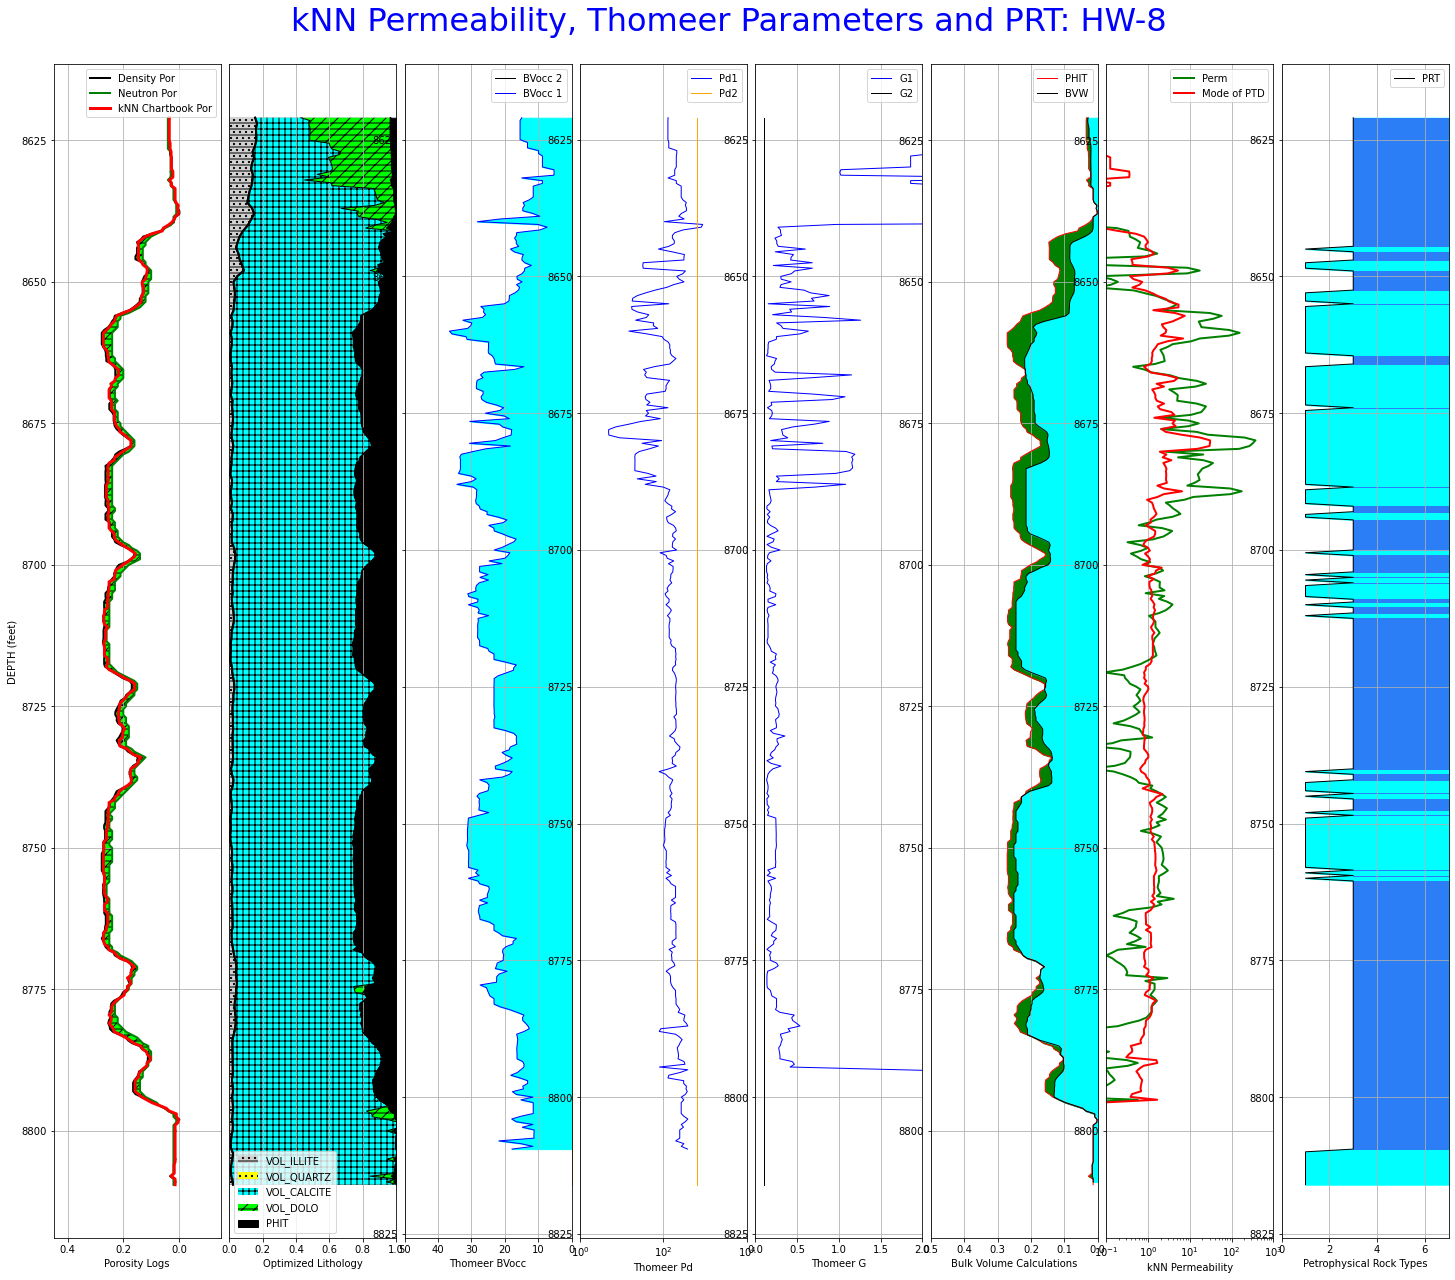

In [190]:
fig = plt.figure(figsize=(25,20))
#fig.suptitle('kNN Permeability, Thomeer Parameters and PRT',fontsize=32, color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('kNN Permeability, Thomeer Parameters and PRT: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)



gs = gridspec.GridSpec(1, 8)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])
ax8 = fig.add_subplot(gs[0,7])


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)




# Thomeer BVocc 
BVocc1=np.array(bv1_est_knn)
BVocc2=np.array(bv2_est_knn)

# BVocc Depth Track
ax3.plot(BVocc2, y,'-k', lw=1, label= 'BVocc 2')
ax3.plot(BVocc2+BVocc1,y,'-b',lw=1, label= 'BVocc 1')
#ax3.plot(BVocc2+BVocc1,y,'-b',lw=1, label= 'BVocc 1')

ax3.set_xlabel("Thomeer BVocc",color='black')
ax3.set_xlim(50., 0.0)
ax3.fill_betweenx(y,BVocc2,BVocc1+BVocc2, color='cyan')#, label= 'VOL_DOLO')
ax3.fill_betweenx(y,0,bv2_est_knn, color='orange')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)


# Thomeer Pd
Pd1=np.array(pd1_est_knn)
Pd2=np.array(pd2_est_knn)

# Pd Track
ax4.semilogx(Pd1, y,'-b', lw=1, label= 'Pd1')
ax4.semilogx(Pd2, y,'-',color='orange', lw=1, label= 'Pd2')
ax4.set_xlabel("Thomeer Pd",color='black')
ax4.set_xlim(1, 10000)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Thomeer G
G1=np.array(g1_est_knn)
G2=np.array(g2_est_knn)

# Thomeer G
ax5.plot(G1, y,'-b', lw=1, label= 'G1')
ax5.plot(G2, y,'-k', lw=1, label= 'G2')
ax5.set_xlabel("Thomeer G",color='black')
ax5.set_xlim(0, 2.0)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)



# Error Theoretical vs. Actual normalized logs

ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)



# Permeability
ax7.semilogx(perm, y,'-g', lw=2, label= 'Perm')
ax7.semilogx(mode, y,'-r', lw=2, label= 'Mode of PTD')
ax7.set_xlabel("kNN Permeability",color='black')
ax7.set_xlim(0.1, 1000.0)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)




# Rock Index or PRT
ax8.plot(rock_index_knn, y,'-k', lw=1, label= 'PRT')
ax8.set_xlabel("Petrophysical Rock Types",color='black')
ax8.set_xlim(0., 7.0)
ax8.fill_betweenx(y,rock_index_knn,7, color='cyan')
ax8.legend()
ax8.invert_yaxis()
ax8.grid(True)

## Setting Up Shading for GR
left_col_value = 2
right_col_value = 7
span = abs(left_col_value - right_col_value)
cmap = plt.get_cmap('rainbow')
#cmap = plt.get_cmap('cool')

color_index = np.arange(left_col_value, right_col_value, span / 6)
#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain color for color index value
    ax8.fill_betweenx(y, rock_index_knn , right_col_value, where = rock_index_knn >= index,  color = color)



# 5) Thomeer Capillary Pressure Bulk Volume Oil (BVO) Calculations:

## Free Water Level (FWL) Search
We have provided a FWL Search technique in python too to estimate the FWL elevation (TVDss) in each key well to be used to create a FWL plane for the field. To model Capillary Pressure saturations, it is essential to have a proper Free Water Level (FWL). Reservoir Capillary Pressure or buoyancy is dependent upon the height above the FWL. 

On new discoveries the FWL is usually determined from Formation Test data plotting the pressure data vs. TVDss to find the intersection of the water gradient vs. hydrocarbon gradient. The elevation of this intersection is the FWL or zero Capillary Pressure. However, on older fields, this type of data is typically not available prior to pressure depletion and/or fluid contact movements in the field. Therefore, we need another way to estimate the FWL for the field. In the python software used in our Notebook we offer a FWL search technique that has been shown to work very well in numerous fields.

We perform this well-by-well FWL search by varying the FWL elevation from an estimated highest FWL to the lowest expected FWL (spill point...) for the reservoir.  We then calculate the error difference between the Bulk Volume Oil (BVO) from logs vs. BVO from Thomeer Capillary Pressure at each new FWL estimate for that well. The final fwl_est is the FWL estimated with the lowest Bulk Volume Oil (BVO) error for that well. This fwl_est is then used in our final Thomeer BVO Oil calculations.

The FWL search is usually run on all wells with a fwl_est for each well. In many instances in fields with large hydrocarbon columns, the wells near the crest will be too high above the FWL to give valid results. We have found that the wells near the edge usually give the best estimation. However, those wells affected by water encroachment will also not give valid results. In the end it is usually a small percentage of wells near the edge of the field that will give valid FWL estimates that are consistent. The search results from these wells are then typically used to construct a plane in the 3D fine-grid model to represent the FWL for the field.

It should be noted, that not all FWL surfaces are flat. Structural tilting, subduction, and dynamic aquifers... can result in a tilted FWL elevations with the possibility of residual oil below the FWL, depending in the situation. 

In [191]:
print(elev_meas_ref)

416


In [192]:
#elev_meas_ref = 397


bvo_error_temp=222



# loop through FWL Search from 8100 to 8300 steps 
for fwl in range(FWL_UPPER_ESTIMATE, FWL_LOWER_ESTIMATE,2):

    
    h=[]
    PcRes=[]
    PcHg=[]
    por_upscale_fact=[]
    bvocc1=[]
    bvocc2=[]
    bvo_thomeer=[]
    bvo_error=[]
    bvo_error_sum=0
    bvo_error_level=[]
    sw_thomeer=[] 


    # Load log data from df
    for k in range(0,len(df_log) ,1):  

        # =============================================================================
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        # # #
        # # #            Calculate Thomeer-based BVO Saturations
        # # #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

        h.append(fwl - (Dep[k]-elev_meas_ref))  #Works Well


        PcRes.append(h[k] *0.433*(rho_f - rho_hc))
        PcHg.append((367/tcosthetaww)*PcRes[k])   

        #------------- Thomeer Upscale Porosity Correction Factor  ------------------------

        bv1=bv1_est_knn[k]/100
        bv2=bv2_est_knn[k]/100

        if porarray[k] > 0.01:
            por_upscale_fact.append((0.1629 * math.log(porarray[k]) + 1.2923) * (porarray[k]/(bv1+bv2)) )
        else:
            por_upscale_fact.append(0.55)

        #------- End of Thomeer Porosity Upscale Correction Factor---------------------------



        #---------------  Calculalte Bulk Volume Occupied at each well-level ----------------
        if PcHg[k] > pd1_est_knn[k]:
            #bvocc1 = bv1*bv_upscale_fact * 10**(-0.434*g1/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd1))
            bvocc1.append(bv1*por_upscale_fact[k]*10**(-0.434*g1_est_knn[k]/math.log10(PcHg[k]/pd1_est_knn[k]))) 

        else:
            bvocc1.append(0.001)

        if PcHg[k] > pd2_est_knn[k]:
            #bvocc2 = bv2*bv_upscale_fact * 10**(-0.434*g2/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd2))
            bvocc2.append(bv2*por_upscale_fact[k]*10**(-0.434*g2_est_knn[k]/math.log10(PcHg[k]/pd2_est_knn[k]))) 
        else:
            bvocc2.append(0.001)



        #---------   Calculate BVO Error  ------------------------------------------------
        bvo_thomeer.append( bvocc1[k] + bvocc2[k])
        sw_thomeer.append(1 - bvo_thomeer[k]/porarray[k])
        bvo_error.append(abs(bvo[k]-bvo_thomeer[k]))
        #print(bvo_error[k],fwl) 
        bvo_error_sum=(bvo_error_sum + bvo_error[k])
    
 


    if bvo_error_sum<bvo_error_temp:
        fwl_est = fwl

    print('FWL Try=',fwl,'\t','BVO_Error_Sum =', bvo_error_sum,'\t','fwl_est =',fwl_est)
    
    bvo_error_temp=bvo_error_sum

print()
print()

FWL Try= 8100 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8102 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8104 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8106 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8108 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8110 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8112 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8114 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8116 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8118 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8120 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8122 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8124 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8126 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8128 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8130 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8132 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8134 	 BVO_Error_Sum = nan 	 fwl_est = 8246
FWL Try= 8136 	 BVO_Error_Sum = nan 	 fwl_est 

### Final Thomeer BVO calculations from the above FWL Search results: 

In [193]:
h=[]
PcRes=[]
PcHg=[]
por_upscale_fact=[]
bvocc1=[]
bvocc2=[]
bvo_thomeer=[]
sw_thomeer=[]


fwl=fwl_est
#fwl=8200
#elev_meas_ref = 397

# Load log data from df
for k in range(0,len(df_log) ,1):  

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            Calculate Thomeer-based BVO Saturations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    h.append(fwl - (Dep[k]-elev_meas_ref))  #Works Well
  
      
    PcRes.append(h[k] *0.433*(rho_f - rho_hc))
    PcHg.append((367/tcosthetaww)*PcRes[k])   

    #------------- Thomeer Upscale Porosity Correction Factor  ------------------------
          
    bv1=bv1_est_knn[k]/100
    bv2=bv2_est_knn[k]/100

    if porarray[k] > 0.01:
        por_upscale_fact.append((0.1629 * math.log(porarray[k]) + 1.2923) * (porarray[k]/(bv1+bv2)) )
    else:
        por_upscale_fact.append(0.55)
   
    #------- End of Thomeer Porosity Upscale Correction Factor---------------------------
         
         
           
    #---------------  Calculalte Bulk Volume Occupied at each well-level ----------------
    if PcHg[k] > pd1_est_knn[k]:
        #bvocc1 = bv1*bv_upscale_fact * 10**(-0.434*g1/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd1))
        bvocc1.append(bv1*por_upscale_fact[k]*10**(-0.434*g1_est_knn[k]/math.log10(PcHg[k]/pd1_est_knn[k]))) 
     
    else:
        bvocc1.append(0.001)

    if PcHg[k] > pd2_est_knn[k]:
        #bvocc2 = bv2*bv_upscale_fact * 10**(-0.434*g2/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd2))
        bvocc2.append(bv2*por_upscale_fact[k]*10**(-0.434*g2_est_knn[k]/math.log10(PcHg[k]/pd2_est_knn[k]))) 
    else:
        bvocc2.append(0.001)

 

    #---------   Calculate BVO and Sw  ------------------------------------------------
    bvo_thomeer.append( bvocc1[k]  + bvocc2[k])
    sw_thomeer.append(1 - bvo_thomeer[k]/porarray[k])

    #print(porarray[k],bvocc1[k],bvocc2[k],bvo_thomeer[k],sw_thomeer[k])
    
    
    
print(fwl,len(bvocc1),len(bvocc2), len(bvocc2),len(sw_thomeer))

8246 391 391 391 391


## Depth Plot of BVO:

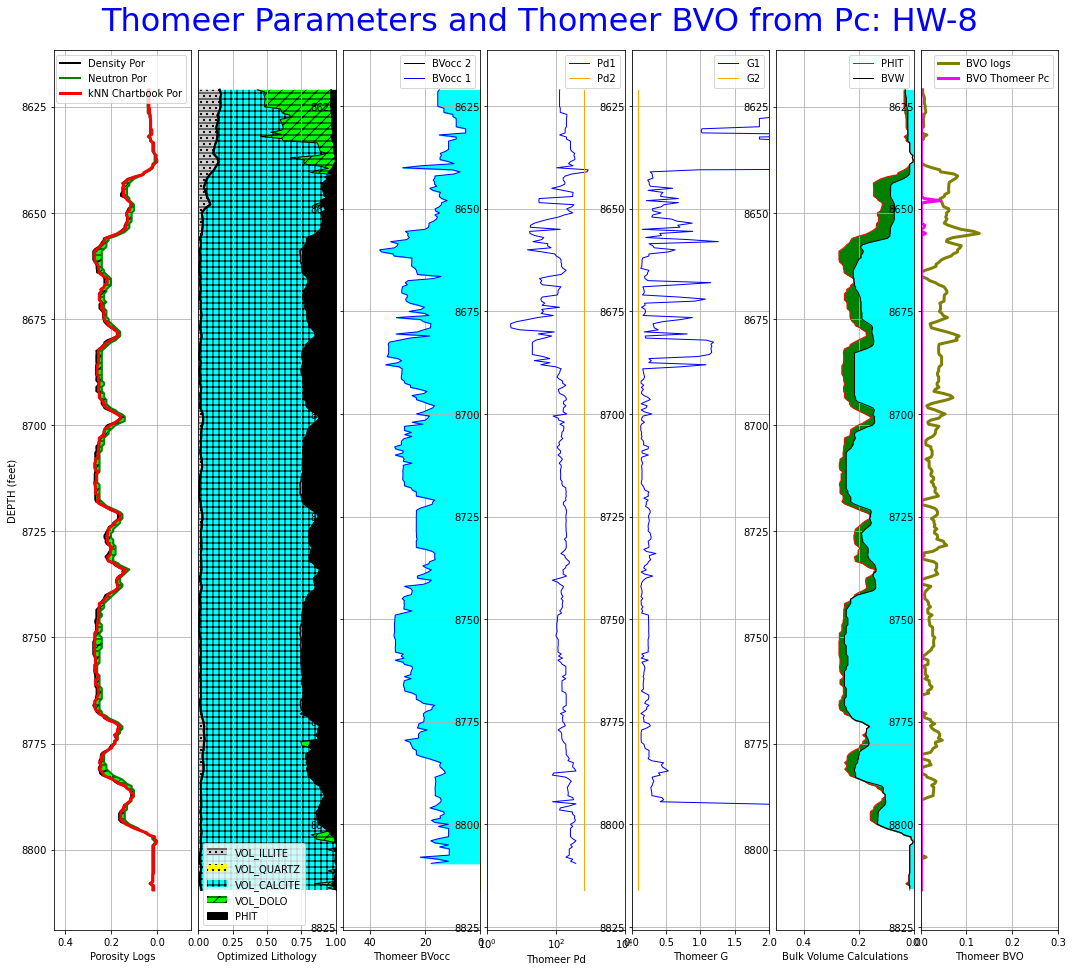

In [194]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Thomeer Parameters and Thomeer BVO from Pc',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Thomeer Parameters and Thomeer BVO from Pc: %s'%wellname, fontsize=32, color='blue')#,y=0.9)
fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)


gs = gridspec.GridSpec(1, 7)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)




# Thomeer BVocc 
BVocc1=np.array(bv1_est_knn)
BVocc2=np.array(bv2_est_knn)

# BVocc Depth Track
ax3.plot(BVocc2, y,'-k', lw=1, label= 'BVocc 2')
ax3.plot(BVocc1+BVocc2,y,'-b',lw=1, label= 'BVocc 1')
ax3.set_xlabel("Thomeer BVocc",color='black')
ax3.set_xlim(50., 0.0)
ax3.fill_betweenx(y,BVocc2,BVocc1+BVocc2, color='cyan')#, label= 'VOL_DOLO')
ax3.fill_betweenx(y,0,BVocc2, color='orange')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)


# Thomeer Pd
Pd1=np.array(pd1_est_knn)
Pd2=np.array(pd2_est_knn)

# Pd Track
ax4.semilogx(Pd1, y,'-b', lw=1, label= 'Pd1')
ax4.semilogx(Pd2, y,'-',color='orange', lw=1, label= 'Pd2')
ax4.set_xlabel("Thomeer Pd",color='black')
ax4.set_xlim(1, 10000)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Thomeer G
G1=np.array(g1_est_knn)
G2=np.array(g2_est_knn)

# Thomeer G
ax5.plot(G1, y,'-b', lw=1, label= 'G1')
ax5.plot(G2, y,'-',color='orange', lw=1, label= 'G2')
ax5.set_xlabel("Thomeer G",color='black')
ax5.set_xlim(0, 2.0)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)



# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)


# Thomeer BVO
#bvo_Pc = np.array(bvo_thomeer)


# Thomeer BVO
ax7.plot(bvo, y,'-', color='olive', lw=3, label= 'BVO logs')
ax7.plot(bvo_thomeer, y,'-', color='magenta', lw=3, label= 'BVO Thomeer Pc')
ax7.set_xlabel("Thomeer BVO",color='black')
ax7.set_xlim(0., 0.3)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)

# 6) Export Results:

In [195]:
# Header line
print('Depth','\t','PHIT','\t','BVO','\t','Pd1','\t','Pd2','\t','\t','G1','\t','G2','\t','BV1','\t','BV2','\t','Perm')

# level-by-level data
for k in range(10,len(df_log) ,1):  

    print(Dep[k],'\t',round(porarray[k],2),'\t',round(bvo_thomeer[k],2), \
          '\t',round(pd1_est_knn[k],0),'\t',round(pd2_est_knn[k],0),'\t','\t',round(g1_est_knn[k],2), \
          '\t',round(g2_est_knn[k],2), '\t',round(bv1_est_knn[k],1), \
          '\t',round(bv2_est_knn[k],1), '\t',round(perm[k],2)    ) 


Depth 	 PHIT 	 BVO 	 Pd1 	 Pd2 	 	 G1 	 G2 	 BV1 	 BV2 	 Perm
8626.0 	 0.03 	 0.0 	 134.0 	 650 	 	 2.94 	 0.1 	 13.2 	 0 	 0.01
8626.5 	 0.03 	 0.0 	 134.0 	 650 	 	 2.94 	 0.1 	 13.2 	 0 	 0.01
8627.0 	 0.03 	 0.0 	 208.0 	 650 	 	 2.15 	 0.1 	 9.9 	 0 	 0.01
8627.5 	 0.03 	 0.0 	 208.0 	 650 	 	 2.15 	 0.1 	 9.9 	 0 	 0.01
8628.0 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8628.5 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8629.0 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8629.5 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8630.0 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8630.5 	 0.02 	 0.0 	 186.0 	 650 	 	 1.02 	 0.1 	 5.3 	 0 	 0.01
8631.0 	 0.02 	 0.0 	 185.0 	 650 	 	 1.01 	 0.1 	 5.2 	 0 	 0.01
8631.5 	 0.02 	 0.0 	 186.0 	 650 	 	 1.02 	 0.1 	 5.3 	 0 	 0.01
8632.0 	 0.03 	 0.0 	 129.0 	 650 	 	 3.36 	 0.1 	 14.9 	 0 	 0.01
8632.5 	 0.03 	 0.0 	 203.0 	 650 	 	 1.86 	 0.1 	 8.7 	 0 	 0.01
8633.0 	 0.

### This section will write out the above text data to a file called 'results.txt':

In [196]:
import sys

original_stdout = sys.stdout # Save a reference to the original standard output

with open('results.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.

    # Header line
    print('Depth','\t','PHIT','\t','BVO','\t','Pd1','\t','Pd2','\t','\t','G1','\t','G2','\t','BV1','\t','BV2','\t','Perm')
    
    # level-by-level data
    for k in range(10,len(df_log) ,1):  

        print(Dep[k],'\t',round(porarray[k],2),'\t',round(bvo_thomeer[k],2), \
              '\t',round(pd1_est_knn[k],0),'\t',round(pd2_est_knn[k],0),'\t','\t',round(g1_est_knn[k],2), \
              '\t',round(g2_est_knn[k],2), '\t',round(bv1_est_knn[k],1), \
              '\t',round(bv2_est_knn[k],1), '\t',round(perm[k],2)    ) 
    
    sys.stdout = original_stdout # Reset the standard output to its original value





## The next section will create a DataFrame for our results data:

In [197]:
results=[Dep ,porarray,rhoarray,bvo_thomeer,sw_thomeer, VOL_QUARTZ,VOL_CALCITE,VOL_DOLO,VOL_ILLITE,pd1_est_knn, pd2_est_knn, g1_est_knn, g2_est_knn,bv1_est_knn, bv2_est_knn, perm, rock_index_knn] 
results_transpose = np.transpose(results)


#results=[                                            Dep ,porarray,rhoarray,  bvo_thomeer,sw_thomeer, VOL_QUARTZ,VOL_CALCITE,VOL_DOLO,VOL_ILLITE,      pd1_est_knn, pd2_est_knn, g1_est_knn, g2_est_knn,bv1_est_knn, bv2_est_knn, perm, rock_index_knn] 
df_results=pd.DataFrame(results_transpose, columns = ['DEPT' ,'PHIT','Rho_Matrix','BVO_Thomeer','Sw_Thomeer',        'Vol_Quartz','Vol_Calcite','Vol_dolo','Vol_Illite','Pd1_knn', 'Pd2_knn',      'G1_knn', 'G2_knn',    'BV1_knn', 'BV2_knn',  'Perm_knn','ROCK_INDEX'])

#df_reset=df_results.reset_index(drop=True)
df_results.reset_index(drop=True)
df_results.head()

,DEPT,PHIT,Rho_Matrix,BVO_Thomeer,Sw_Thomeer,Vol_Quartz,Vol_Calcite,Vol_dolo,Vol_Illite,Pd1_knn,Pd2_knn,G1_knn,G2_knn,BV1_knn,BV2_knn,Perm_knn,ROCK_INDEX
0,8621.0,0.034232,2.756624,0.001,0.970788,0.0,0.273243,0.536683,0.155842,128.898129,650.0,3.360193,0.1,14.912921,0.0,0.010001,3.0
1,8621.5,0.035035,2.754175,0.001,0.971457,0.0,0.322785,0.480716,0.161464,127.570444,650.0,3.483968,0.1,15.427108,0.0,0.010000,3.0
2,8622.0,0.035035,2.754175,0.001,0.971457,0.0,0.309499,0.488435,0.167031,127.570444,650.0,3.483968,0.1,15.427108,0.0,0.010000,3.0
3,8622.5,0.035035,2.754175,0.001,0.971457,0.0,0.317551,0.483757,0.163657,127.570444,650.0,3.483968,0.1,15.427108,0.0,0.010000,3.0
4,8623.0,0.035035,2.754175,0.001,0.971457,0.0,0.325737,0.479000,0.160227,127.570444,650.0,3.483968,0.1,15.427108,0.0,0.010000,3.0


### This is our original DataFrame from reading in the las file and converting to a DataFrame:

In [198]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 391 entries, 8621.0 to 8816.0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         378 non-null    float64
 1   RHOB       378 non-null    float64
 2   NPHI       378 non-null    float64
 3   DT         0 non-null      float64
 4   PHIE       378 non-null    float64
 5   RT         377 non-null    float64
 6   SW         31 non-null     float64
 7   SO         31 non-null     float64
 8   CORE_POR   353 non-null    float64
 9   CORE_PERM  353 non-null    float64
dtypes: float64(10)
memory usage: 33.6 KB


### This section will merge the two Pandas DataFrames:
**df_log from original las file and the new df_results DataFrame are used**

In [199]:
file_out = pd.merge(df_log, df_results ,how="left", on=["DEPT", "DEPT"])
#file_out.reset_index(drop=True)
#df_file_out=las.file_out().reset_index()
#file_out=file_out.iloc[:,0:]
#del file_out[file_out.columns[0]]

In [200]:
file_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEPT         391 non-null    float64
 1   GR           378 non-null    float64
 2   RHOB         378 non-null    float64
 3   NPHI         378 non-null    float64
 4   DT           0 non-null      float64
 5   PHIE         378 non-null    float64
 6   RT           377 non-null    float64
 7   SW           31 non-null     float64
 8   SO           31 non-null     float64
 9   CORE_POR     353 non-null    float64
 10  CORE_PERM    353 non-null    float64
 11  PHIT         378 non-null    float64
 12  Rho_Matrix   378 non-null    float64
 13  BVO_Thomeer  391 non-null    float64
 14  Sw_Thomeer   378 non-null    float64
 15  Vol_Quartz   391 non-null    float64
 16  Vol_Calcite  378 non-null    float64
 17  Vol_dolo     378 non-null    float64
 18  Vol_Illite   378 non-null    float64
 19  Pd1_knn 

### This will write out an Excel file of the Petrophysical Analysis with the Well Name:

In [201]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

 (STRT): 8155.0
 (STOP): 8816.0
 (STEP): 0.5
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): HW-8
FIELD (FLD): COSTA
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2018-02-06 14:55:38   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): HW-8
API NUMBER (API): 


In [202]:
print(las.well.well.value)

HW-8


In [203]:
directory = "./results/Petrophysial_analysis_"
wellname=las.well.well.value
ext='.xlsx'
filepath =  directory  + wellname + ext
file_out.to_excel(filepath)

# **Write file_out to las following the code from Andy McDonald's method to convert csv to las**

**Watch Andy's YouTube presentation on this:**

https://www.youtube.com/watch?v=GwAbfriuHr4


In [204]:
las_file = lasio.LASFile()

In [205]:
las_file.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="nan", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="nan", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="nan", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
  HeaderItem(mnemonic="STAT", unit=""

In [206]:
well_name = las.well.well.value
field_name = las.well.fld.value
uwi = las.well.uwi.value

In [207]:
las_file.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="nan", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="nan", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="nan", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
  HeaderItem(mnemonic="STAT", unit=""

In [208]:
las_file.add_curve('DEPT',file_out['DEPT'],unit='ft')

In [209]:
las_file.curves

[CurveItem(mnemonic="DEPT", unit="ft", value="", descr="", original_mnemonic="DEPT", data.shape=(391,))]

In [210]:
directory_las = "./results/Petrophysical_analysis_"
wellname=las.well.well.value
ext_las='.las'
filepath_las =  directory_las  + wellname + ext_las
#file_out.to_excel(filepath)

In [211]:
units=['ft',
       'GAPI',
       'G/C3',
       'V/V',
       'US/F',
       'V/V',
       'OHMM',
       'V/V',
       'V/V',
       '%',
       'mD' ,
       'V/V',
       'G/C3',
       'V/V',
       'V/V',
       'V/V',
       'V/V',
       'V/V',
       'V/V',
       'psi',
       'psi',
       '',
       '',
       '%',
       '%',
       'mD',
       '']

       


In [212]:
for col, unit in zip(file_out.columns,units):
    if col !='DEPT':
        las_file.add_curve(col,file_out[col], unit=unit)

In [213]:
las_file.curves

[CurveItem(mnemonic="DEPT", unit="ft", value="", descr="", original_mnemonic="DEPT", data.shape=(391,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="", original_mnemonic="GR", data.shape=(391,)),
 CurveItem(mnemonic="RHOB", unit="G/C3", value="", descr="", original_mnemonic="RHOB", data.shape=(391,)),
 CurveItem(mnemonic="NPHI", unit="V/V", value="", descr="", original_mnemonic="NPHI", data.shape=(391,)),
 CurveItem(mnemonic="DT", unit="US/F", value="", descr="", original_mnemonic="DT", data.shape=(391,)),
 CurveItem(mnemonic="PHIE", unit="V/V", value="", descr="", original_mnemonic="PHIE", data.shape=(391,)),
 CurveItem(mnemonic="RT", unit="OHMM", value="", descr="", original_mnemonic="RT", data.shape=(391,)),
 CurveItem(mnemonic="SW", unit="V/V", value="", descr="", original_mnemonic="SW", data.shape=(391,)),
 CurveItem(mnemonic="SO", unit="V/V", value="", descr="", original_mnemonic="SO", data.shape=(391,)),
 CurveItem(mnemonic="CORE_POR", unit="%", value="", descr="", o

In [214]:
las_file.write(filepath_las,version=2.0)

In [215]:
timecosts = (time.time() - s_time)
print(f'time: {np.mean(timecosts):.5f}s')



time: 947.96108s


# 